In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import median_test
%matplotlib inline

# Table of Contents
1. Introduction
2. Do some races spend more time in the hospital than others?
3. Is one gender affected more by diabetes?
4. Do older individuals experience more extreme cases of diabetes?
5. Summary 
6. Future Research

# Introduction
Diabetes is an extremely prevalent disease in our society. Currently it affects at least 171 million people worldwide and this figure is expected to double by 2030. Diabetes is caused by the body's inability to either produce or respond to insulin, a hormone produced by the pancreas that lowers blood sugar. Chronic high blood sugar can lead to many complications including cardiovascular disease, nerve damage, kindey damage, eye damage, foot damage, skin conditions, hearing impairment, and Alzheimers. This study was performed to try to find trends in groups of people that are more likely to suffer from diabetes or to have more extreme cases in an effort to elucidate risk factors.

In [3]:
#Import and explore the data
diabetes = pd.read_csv('/Users/spencerfogelman/Downloads/diabetes-training.csv')
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392.0,8222157.0,Caucasian,Female,[0-10),?,6.0,25.0,1.0,1.0,...,No,No,No,No,No,No,No,No,No,NO
1,149190.0,55629189.0,Caucasian,Female,[10-20),?,1.0,1.0,7.0,3.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410.0,86047875.0,AfricanAmerican,Female,[20-30),?,1.0,1.0,7.0,2.0,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364.0,82442376.0,Caucasian,Male,[30-40),?,1.0,1.0,7.0,2.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680.0,42519267.0,Caucasian,Male,[40-50),?,1.0,1.0,7.0,1.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Question 1: Do some races spend more time in the hospital than others?


Caucasian          75303
AfricanAmerican    19073
?                   2234
Hispanic            2003
Other               1465
Asian                624
Name: race, dtype: int64


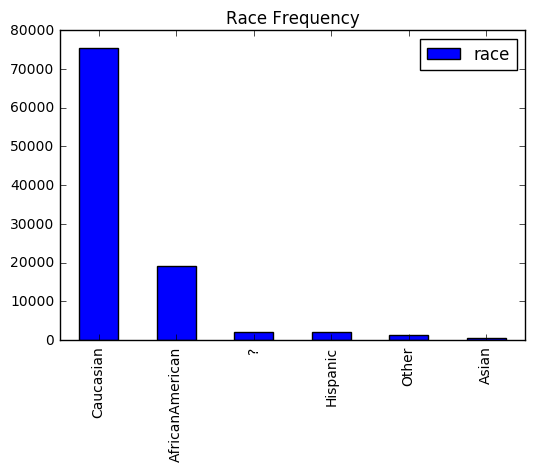

In [4]:
#Find the frequency of each race and plot a bar plot.
print(diabetes.race.value_counts()) 
race = pd.DataFrame(diabetes.race.value_counts())
race.plot(kind='bar')
plt.title('Race Frequency')
plt.show()

* Caucasian is the most represented race in the diabetes study. This makes sense because they are also the most prominent race in the United States. African Americans are the second most represented in both the study and in US population.

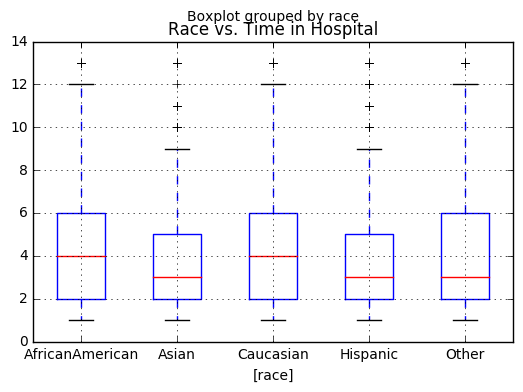

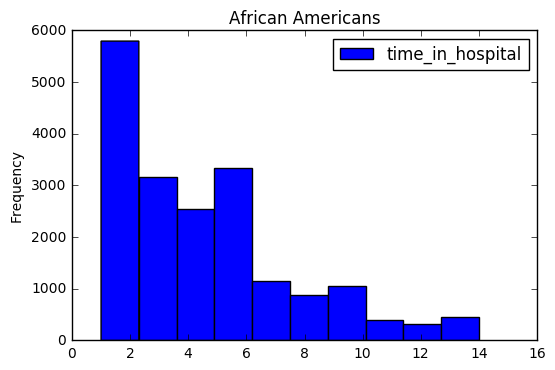

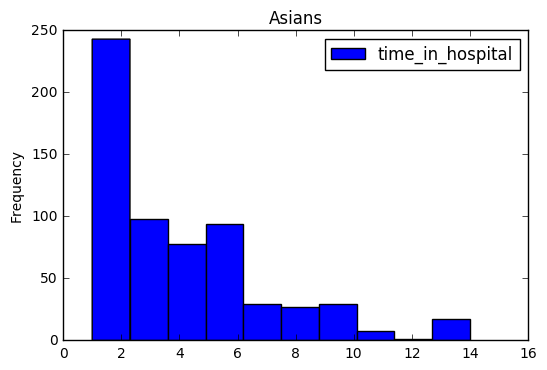

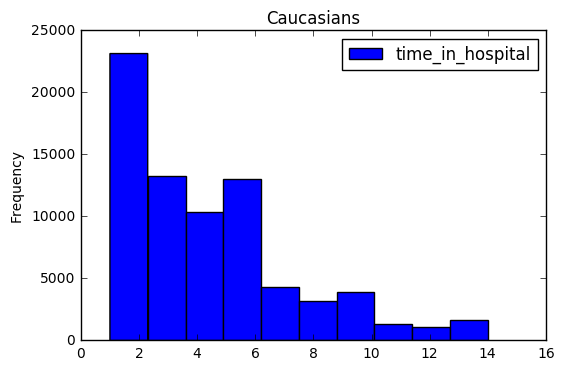

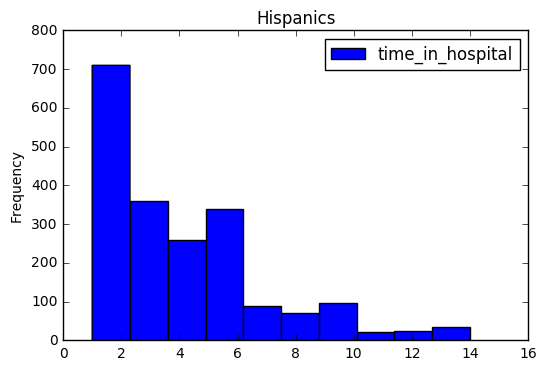

In [5]:
#Plot the time in hospital for all races as adjacent boxplots. Question marks were removed.
diabetes.loc[:, ['time_in_hospital', 'race']].loc[diabetes.race != '?'].boxplot(by='race')
plt.title('Race vs. Time in Hospital')
#Plot the distribution of all the races using a histogram.
diabetes[diabetes.race == 'AfricanAmerican'][['time_in_hospital']].plot(kind='hist')
plt.title('African Americans')
diabetes[diabetes.race == 'Asian'][['time_in_hospital']].plot(kind='hist')
plt.title('Asians')
diabetes[diabetes.race == 'Caucasian'][['time_in_hospital']].plot(kind='hist')
plt.title('Caucasians')
diabetes[diabetes.race == 'Hispanic'][['time_in_hospital']].plot(kind='hist')
plt.title('Hispanics')
plt.show()

* It seems that Caucasians and African Americans spend more time in the hospital on average than Asians and Hispanics visually.
* Based on the histograms and boxplots we can see that all the data is right skewed, which warrants using a median to look at central tendancy and then using a median test to look at significance.


In [6]:
#Plot the median time in hospital for all races.
african =diabetes.loc[diabetes.race == 'AfricanAmerican']['time_in_hospital'].median()
print('african: ' + str(african))
asian =diabetes.loc[diabetes.race == 'Asian']['time_in_hospital'].median()
print('asian: ' + str(asian))
caucasian =diabetes.loc[diabetes.race == 'Caucasian']['time_in_hospital'].median()
print('Caucasian: ' + str(caucasian))
hispanic =diabetes.loc[diabetes.race == 'Hispanic']['time_in_hospital'].median()
print('Hispanic: ' + str(hispanic))

african: 4.0
asian: 3.0
Caucasian: 4.0
Hispanic: 3.0


* African Americans and Caucasians spend a median of 4 hours in the hospital, which Hispanics and Asians spend an median of 3 hours in the hospital.


In [23]:
#Perform median tests on all the groups to figure out if the groups are in fact different.
african =diabetes.loc[diabetes.race == 'AfricanAmerican']['time_in_hospital']
asian =diabetes.loc[diabetes.race == 'Asian']['time_in_hospital']
caucasian =diabetes.loc[diabetes.race == 'Caucasian']['time_in_hospital']
hispanic =diabetes.loc[diabetes.race == 'Hispanic']['time_in_hospital']
stat, p, med, tbl = median_test(african, caucasian)
print('Africans vs. Caucasians:', stat, p)
stat, p, med, tbl = median_test(caucasian, hispanic)
print('Caucasians vs. Hispanics:', stat, p)
stat, p, med, tbl = median_test(caucasian, asian)
print('Caucasians vs. Asians:', stat, p)
stat, p, med, tbl = median_test(asian, hispanic)
print('Asian vs. Hispanic:', stat, p)




Africans vs. Caucasians: 20.084160804 7.41078882154e-06
Caucasians vs. Hispanics: 14.6697789122 0.000128083521939
Caucasians vs. Asians: 6.4356023953 0.0111855217496
Asian vs. Hispanic: 0.220165665899 0.638913718262


* Based on the median tests, Africans and Caucasians actually spend different times in the hospital, which is surprising because the boxplots suggested they spent the same amount of time.
* Based on the median tests, Africans and Caucasians are in fact different from Hispanics and Asians.
* Based on the median tests, Hispanics and Asians do in fact spend the same amount of time in the hospital.
* Possible explanation: There are many possibly explanations for these results. Asians and Hispanics may be healthier than African Americans and Caucaians in general. Another possible explanation is that African Americans and Caucasians experience worse cases of diabetes. Finally , Asians and Hispanics may not have access to as good healthcare.

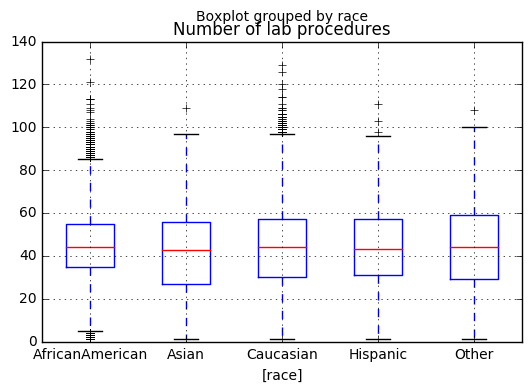

In [8]:
#Plot the number of lab procedures for all races as adjacent boxplots. Question marks were removed.
diabetes[['num_lab_procedures', 'race']][diabetes.race != '?'].boxplot(by='race')
plt.title('Number of lab procedures')
plt.show()


* It is interesting that there are so many outliers for just African Americans and Caucasians when looking at the number of lab procedures each race had.

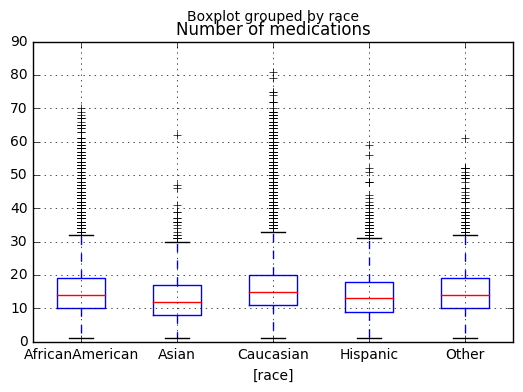

In [9]:
#Plot the number of medications for all races as adjacent boxplots. Question marks were removed.
diabetes[['num_medications', 'race']][diabetes.race !='?'].boxplot(by='race')
plt.title('Number of medications')
plt.show()

In [24]:
african =diabetes.loc[diabetes.race == 'AfricanAmerican']['num_medications']
asian =diabetes.loc[diabetes.race == 'Asian']['num_medications']
caucasian =diabetes.loc[diabetes.race == 'Caucasian']['num_medications']
hispanic =diabetes.loc[diabetes.race == 'Hispanic']['num_medications']
stat, p, med, tbl = median_test(african, caucasian)
print('Africans vs. Caucasians:', stat, p)
stat, p, med, tbl = median_test(caucasian, hispanic)
print('Caucasians vs. Hispanics:', stat, p)
stat, p, med, tbl = median_test(caucasian, asian)
print('Caucasians vs. Asians:', stat, p)
stat, p, med, tbl = median_test(asian, hispanic)
print('Asian vs. Hispanic:', stat, p)

Africans vs. Caucasians: 137.28243562 1.04597806547e-31
Caucasians vs. Hispanics: 116.78551683 3.19853055477e-27
Caucasians vs. Asians: 65.4551735786 5.94509618302e-16
Asian vs. Hispanic: 11.2757402364 0.000785265363286


* African Americans and Caucasians also are on a higher number of medications than Hispanics and Asians. The t-tests show that the groups are all different in regards to the number of medications. 

# Question 2: Is one gender more affected by diabetes?

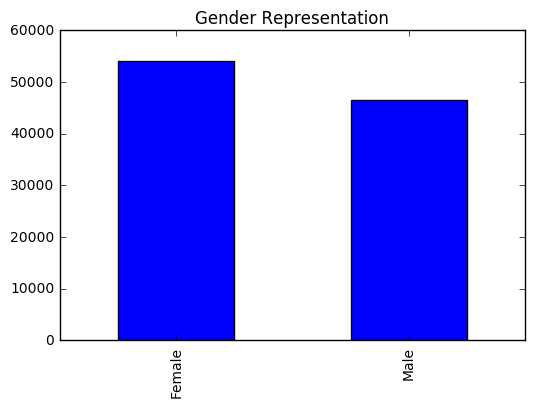

In [26]:
#Find the distribution of genders. Invalid entries were removed.
diabetes = diabetes[(diabetes.gender == 'Female') | (diabetes.gender == 'Male')]
diabetes.gender.value_counts().plot(kind='bar')
plt.title('Gender Representation')
plt.show()



* The two genders seem to be about equally represented in the study, although there are sligtly more females.

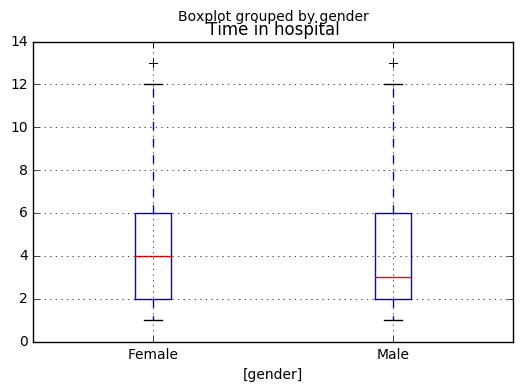

male: 3.0
female: 4.0
Males vs. Females 68.2792892107 1.41903582107e-16


In [29]:
#Plot the time in hospital for both genders as adjacent boxplots.
diabetes[['time_in_hospital', 'gender']].boxplot(by='gender')
plt.title('Time in hospital')
plt.show()
#Find the median time in hospital for both genders.
male = diabetes.loc[diabetes.gender == 'Male']['time_in_hospital']
female = diabetes.loc[diabetes.gender == 'Female']['time_in_hospital']
print('male: ' + str(male.median()))
print('female: ' + str(female.median()))
#Perform a median test to figure out if both genders are in fact different.
stat, p, med, tbl = median_test(male, female)
print('Males vs. Females', stat, p)



* Females spend more time in the hospital than males. Based on the t-test these groups are in fact not similar. Like with regards to race, there are many possible explanations for this. Females may recieve better healthcare than males, or they may be more health consious. Another explanation could be that females exerpience worse cases of diabetes.

male: 44.0
female: 44.0
Males vs. Females 15.3458319426 8.95181981183e-05


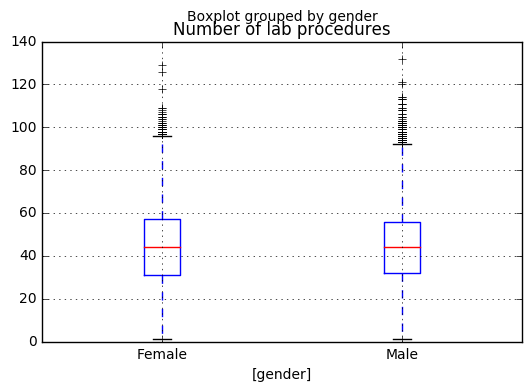

In [30]:
#Plot the number of lab procedures for both genders as adjacent boxplots.
diabetes[['num_lab_procedures', 'gender']].boxplot(by='gender')
plt.title('Number of lab procedures')
male = diabetes.loc[diabetes.gender == 'Male']['num_lab_procedures']
female = diabetes.loc[diabetes.gender == 'Female']['num_lab_procedures']
#Find the median number of lab procedures for both groups.
print('male: ' + str(male.median()))
print('female: ' + str(female.median()))
#Perform a median test to figure out if the groups were in fact different.
stat, p, med, tbl = median_test(male, female)
print('Males vs. Females', stat, p)
plt.show()

* Visually it seems that the females and males undergo the same number of lab procedures. They seem to have the same medians, but based on the median test, the two groups are in fact different.

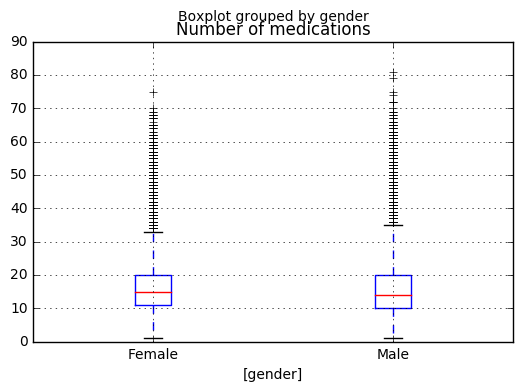

male: 14.0
female: 15.0
Males vs. Females 120.887222973 4.04484419599e-28


In [31]:
#Plot the number of medications for both genders as adjacent boxplots.
diabetes.loc[:, ['num_medications', 'gender']].boxplot(by='gender')
plt.title('Number of medications')
plt.show()
#Find the median number of medications for both genders.
male = diabetes.loc[diabetes.gender == 'Male']['num_medications']
female = diabetes.loc[diabetes.gender == 'Female']['num_medications']
print('male: ' + str(male.median()))
print('female: ' + str(female.median()))
#Perform a t test to see if these groups are in fact different.
stat, p, med, tbl = median_test(male, female)
print('Males vs. Females', stat, p)

* Females are on slightly more medications than men. The possible explanations for this are the same as those that were listed in explaning the different between hours in the hospital based on gender.

# Question 3: Do older individuals experience more extreme cases of diabetes?

[70-80)     25809
[60-70)     22256
[50-60)     17084
[80-90)     16977
[40-50)      9597
[30-40)      3734
[90-100)     2757
[20-30)      1640
[10-20)       685
[0-10)        160
Name: age, dtype: int64


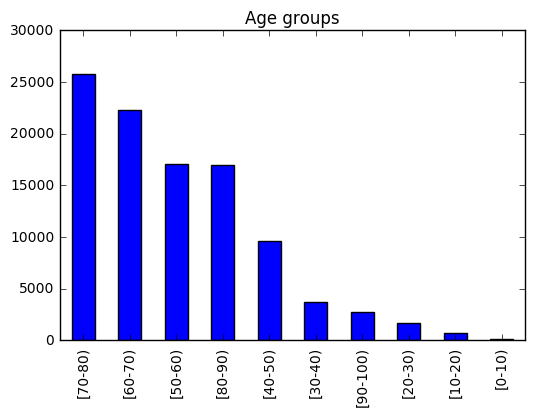

In [14]:
#Find the distribution of age and plot as a bar plot.
diabetes.age.value_counts().plot(kind='bar')
plt.title('Age groups')
values = diabetes.age.value_counts()
print(values)
plt.show()

* In this study, ages were represented by ranges rather than discrete numbers. In general, there are more older individuals in the hospital, with a sharp decrease in the 90 to 100 range, simply due to the fact that theres are much less individuals that survive to this age. This makes sense because by the time you are older, you are more likely to have gotten diabetes just because you have been alive longer.

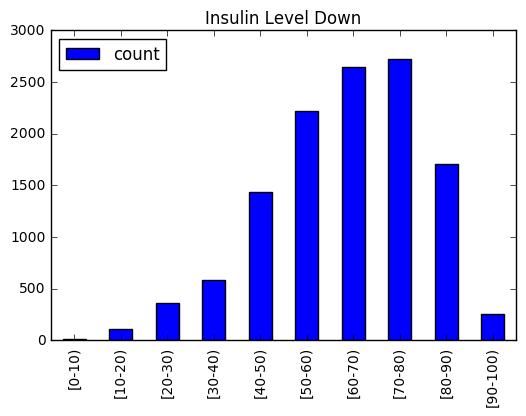

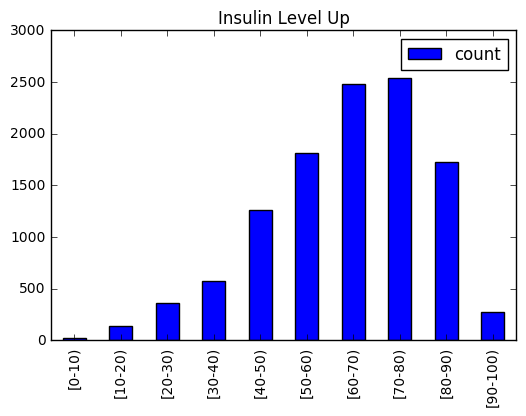

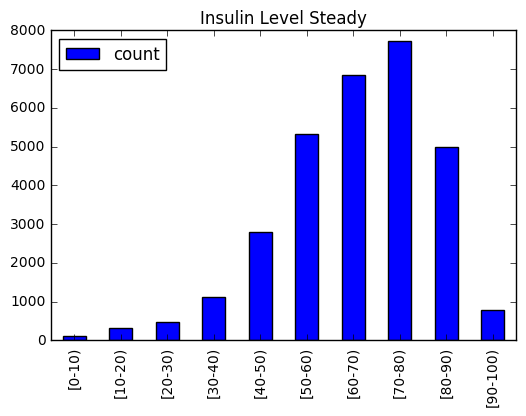

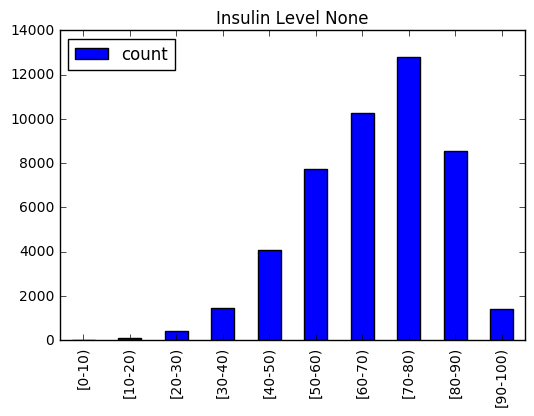

In [15]:
#Group the results by age and insulin level measurements in the hospital.
diabetes1= diabetes.groupby(['age', 'insulin'])[['race']].count().reset_index()
#Rename the columns to make the redsults more clear.
diabetes1.columns= ['age group', 'insulin level', 'count']
down = diabetes1[diabetes1['insulin level'] == 'Down'][['age group', 'count']]
no = diabetes1[diabetes1['insulin level'] == 'No']
steady = diabetes1[diabetes1['insulin level'] == 'Steady']
up = diabetes1[diabetes1['insulin level'] == 'Up']
#Plot the distribiton of ages that experiences lower insulin levels since their last visit.
down.index =np.arange(10)
down.plot(kind='bar')
plt.xticks(down.index, down['age group'])
plt.title('Insulin Level Down')
plt.show()
#Plot the distribution of ages that experienced higher insulin levels since their last visit.
up.index =np.arange(10)
up.plot(kind='bar')
plt.xticks(up.index, up['age group'])
plt.title('Insulin Level Up')
plt.show()
#Plot the distribution of ages that experinced the same level of insulin since their last visit.
steady.index =np.arange(10)
steady.plot(kind='bar')
plt.xticks(steady.index, steady['age group'])
plt.title('Insulin Level Steady')
plt.show()
#Plot the number of individuals that did not have any insulin in their blood at the time of visit.
no.index =np.arange(10)
no.plot(kind='bar')
plt.xticks(no.index, no['age group'])
plt.title('Insulin Level None')
plt.show()



* Since insulin is the hormone that is the center of diabetes, it makes sense to look at insulin levels to see if diabetes severity changes with age. This study did not give discrete blood insulin levels. Instead it compared insulin levels to the last visit in the hospital. The possible recorded data was increased insulin levels, decreased insulin levels, steady insulin levels, or no insulin levels. It is also worth noting that no insulin levels may have meant there were no measurements taken, but the dataset did not have this information available. Because we see the same exact trends when comparing age to all these measurements, it seems that insulin levels in the blood, and thus diabetes severity, is not related to age.

# Summary
This study has shown that interestingly African Americans and Caucasians spend more time on average in the hospital than Hispanics and Latinos. Possible explanations of this include possibly that the former groups recieve better healthcare, or they experience worse cases of diabetes that require more treatment. This idea was corroborated by the fact that Hispanics and Latinos also undergo more tests in the hospital and are on higher number of medications.

This study also has shown that females spend more time in the hospital than men, and are also on more medications. They do however recieve the same number of lab tests. Possible explanations of this are the same as above.

Finally, the study shows that insulin levels in diabetes patients is not related to age.
       

# Future Research
There are many medications on the market for diabetes currently. It would be intereting to see if different races, genders, or age groups respond better to some medications than others.

It would also be interesting to look at blood contents of individuals outside of insulin in an effort to help elucidate the cause of diabetes, which is currently an important topic in research.